In [1]:
# Core Python Data Analysis
from numpy.core.defchararray import index
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Plotting
from plotnine import (
    ggplot, aes,
    geom_col, geom_line, geom_smooth,
    facet_wrap,
    scale_y_continuous, scale_x_datetime,
    labs,
    theme, theme_minimal, theme_matplotlib,
    expand_limits,
    element_text
)

from mizani.breaks import date_breaks
from mizani.formatters import date_format, currency_format

# Misc
from os import mkdir, getcwd

from rich import pretty
pretty.install()

In [2]:
# import xlrd

# help(pd.read_excel)
# files_SPB_new = xlrd.open_workbook(r'bikes.xlsx')
bikes_df = pd.read_excel("bikes.xlsx")
bikeshops_df = pd.read_excel('bikeshops.xlsx')

In [3]:
bikes_df

,bike.id,model,description,price
0,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790
1,2,Supersix Evo Hi-Mod Team,Road - Elite Road - Carbon,10660
2,3,Supersix Evo Hi-Mod Dura Ace 1,Road - Elite Road - Carbon,7990
3,4,Supersix Evo Hi-Mod Dura Ace 2,Road - Elite Road - Carbon,5330
4,5,Supersix Evo Hi-Mod Utegra,Road - Elite Road - Carbon,4260
...,...,...,...,...
92,93,Trail 5,Mountain - Sport - Aluminum,815
93,94,Catalyst 1,Mountain - Sport - Aluminum,705
94,95,Catalyst 2,Mountain - Sport - Aluminum,585
95,96,Catalyst 3,Mountain - Sport - Aluminum,480


In [4]:
bikeshops_df

,bikeshop.id,bikeshop.name,location
0,1,Pittsburgh Mountain Machines,"Pittsburgh, PA"
1,2,Ithaca Mountain Climbers,"Ithaca, NY"
2,3,Columbus Race Equipment,"Columbus, OH"
3,4,Detroit Cycles,"Detroit, MI"
4,5,Cincinnati Speed,"Cincinnati, OH"
5,6,Louisville Race Equipment,"Louisville, KY"
6,7,Nashville Cruisers,"Nashville, TN"
7,8,Denver Bike Shop,"Denver, CO"
8,9,Minneapolis Bike Shop,"Minneapolis, MN"
9,10,Kansas City 29ers,"Kansas City, KS"


In [5]:
orderlines_df = pd.read_excel(
    io = "orderlines.xlsx",
    converters= {'order.date': str}
)

In [6]:
orderlines_df

,Unnamed: 0,order.id,order.line,order.date,customer.id,product.id,quantity
0,1,1,1,2011-01-07 00:00:00,2,48,1
1,2,1,2,2011-01-07 00:00:00,2,52,1
2,3,2,1,2011-01-10 00:00:00,10,76,1
3,4,2,2,2011-01-10 00:00:00,10,52,1
4,5,3,1,2011-01-10 00:00:00,6,2,1
...,...,...,...,...,...,...,...
15639,15640,2000,4,2015-12-25 00:00:00,15,14,1
15640,15641,2000,5,2015-12-25 00:00:00,15,90,1
15641,15642,2000,6,2015-12-25 00:00:00,15,17,1
15642,15643,2000,7,2015-12-25 00:00:00,15,70,1


In [7]:
orderlines_df.head()

,Unnamed: 0,order.id,order.line,order.date,customer.id,product.id,quantity
0,1,1,1,2011-01-07 00:00:00,2,48,1
1,2,1,2,2011-01-07 00:00:00,2,52,1
2,3,2,1,2011-01-10 00:00:00,10,76,1
3,4,2,2,2011-01-10 00:00:00,10,52,1
4,5,3,1,2011-01-10 00:00:00,6,2,1


In [8]:
bikes_df

,bike.id,model,description,price
0,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790
1,2,Supersix Evo Hi-Mod Team,Road - Elite Road - Carbon,10660
2,3,Supersix Evo Hi-Mod Dura Ace 1,Road - Elite Road - Carbon,7990
3,4,Supersix Evo Hi-Mod Dura Ace 2,Road - Elite Road - Carbon,5330
4,5,Supersix Evo Hi-Mod Utegra,Road - Elite Road - Carbon,4260
...,...,...,...,...
92,93,Trail 5,Mountain - Sport - Aluminum,815
93,94,Catalyst 1,Mountain - Sport - Aluminum,705
94,95,Catalyst 2,Mountain - Sport - Aluminum,585
95,96,Catalyst 3,Mountain - Sport - Aluminum,480


In [9]:
orderlines_df.head()

,Unnamed: 0,order.id,order.line,order.date,customer.id,product.id,quantity
0,1,1,1,2011-01-07 00:00:00,2,48,1
1,2,1,2,2011-01-07 00:00:00,2,52,1
2,3,2,1,2011-01-10 00:00:00,10,76,1
3,4,2,2,2011-01-10 00:00:00,10,52,1
4,5,3,1,2011-01-10 00:00:00,6,2,1


In [10]:
bikeshops_df

,bikeshop.id,bikeshop.name,location
0,1,Pittsburgh Mountain Machines,"Pittsburgh, PA"
1,2,Ithaca Mountain Climbers,"Ithaca, NY"
2,3,Columbus Race Equipment,"Columbus, OH"
3,4,Detroit Cycles,"Detroit, MI"
4,5,Cincinnati Speed,"Cincinnati, OH"
5,6,Louisville Race Equipment,"Louisville, KY"
6,7,Nashville Cruisers,"Nashville, TN"
7,8,Denver Bike Shop,"Denver, CO"
8,9,Minneapolis Bike Shop,"Minneapolis, MN"
9,10,Kansas City 29ers,"Kansas City, KS"


In [11]:
s = bikes_df['description']

In [12]:
frequencies_count = s.value_counts()

In [13]:
frequencies_count.nlargest(5)

Mountain - Cross Country Race - Carbon    14
Road - Elite Road - Aluminum              11
Road - Endurance Road - Carbon            11
Road - Elite Road - Carbon                10
Mountain - Sport - Aluminum                9
Name: description, dtype: int64

In [14]:
top_5_bikes_series = bikes_df['description'].value_counts().nlargest(5)

In [15]:
#To call the documentation
?pd.Series.plot

In [16]:
top_5_bikes_series

Mountain - Cross Country Race - Carbon    14
Road - Elite Road - Aluminum              11
Road - Endurance Road - Carbon            11
Road - Elite Road - Carbon                10
Mountain - Sport - Aluminum                9
Name: description, dtype: int64

In [17]:
pd.Series.plot(top_5_bikes_series)
plt.show()

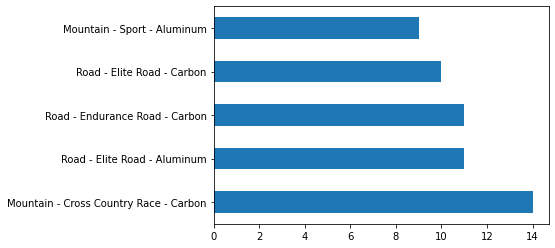

In [18]:
fig = top_5_bikes_series.plot(kind="barh")

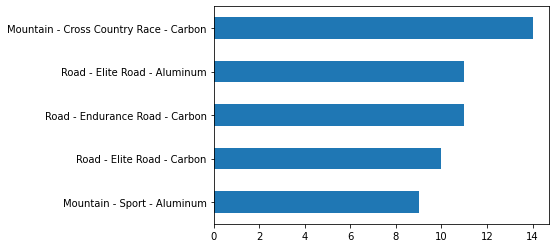

In [19]:
fig = top_5_bikes_series.plot(kind="barh")
fig.invert_yaxis()

In [20]:
fig

In [21]:
plt.show()

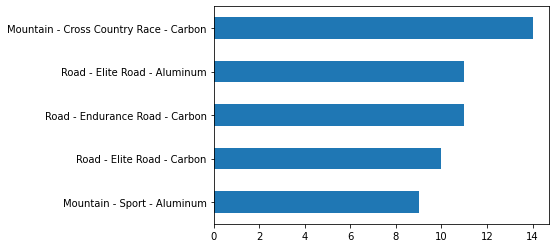

In [22]:
fig = top_5_bikes_series.plot(kind="barh")
fig.invert_yaxis()

In [23]:
fig

In [24]:
plt.show()

In [30]:
# orderlines_df = pd.Dataframe(orderlines_df)
orderlines_df.drop(columns='Unnamed: 0', axis=1)

,order.id,order.line,order.date,customer.id,product.id,quantity
0,1,1,2011-01-07 00:00:00,2,48,1
1,1,2,2011-01-07 00:00:00,2,52,1
2,2,1,2011-01-10 00:00:00,10,76,1
3,2,2,2011-01-10 00:00:00,10,52,1
4,3,1,2011-01-10 00:00:00,6,2,1
...,...,...,...,...,...,...
15639,2000,4,2015-12-25 00:00:00,15,14,1
15640,2000,5,2015-12-25 00:00:00,15,90,1
15641,2000,6,2015-12-25 00:00:00,15,17,1
15642,2000,7,2015-12-25 00:00:00,15,70,1


In [37]:
?pd.merge

In [38]:
bikes_df

,bike.id,model,description,price
0,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790
1,2,Supersix Evo Hi-Mod Team,Road - Elite Road - Carbon,10660
2,3,Supersix Evo Hi-Mod Dura Ace 1,Road - Elite Road - Carbon,7990
3,4,Supersix Evo Hi-Mod Dura Ace 2,Road - Elite Road - Carbon,5330
4,5,Supersix Evo Hi-Mod Utegra,Road - Elite Road - Carbon,4260
...,...,...,...,...
92,93,Trail 5,Mountain - Sport - Aluminum,815
93,94,Catalyst 1,Mountain - Sport - Aluminum,705
94,95,Catalyst 2,Mountain - Sport - Aluminum,585
95,96,Catalyst 3,Mountain - Sport - Aluminum,480


In [44]:
# merging orderlines with bikes
orderlines_df.drop(columns='Unnamed: 0', axis=1) \
    .merge(
        right = bikes_df,
        how='left',
        left_on='product.id',
        right_on='bike.id'
)

,order.id,order.line,order.date,customer.id,product.id,quantity,bike.id,model,description,price
0,1,1,2011-01-07 00:00:00,2,48,1,48,Jekyll Carbon 2,Mountain - Over Mountain - Carbon,6070
1,1,2,2011-01-07 00:00:00,2,52,1,52,Trigger Carbon 2,Mountain - Over Mountain - Carbon,5970
2,2,1,2011-01-10 00:00:00,10,76,1,76,Beast of the East 1,Mountain - Trail - Aluminum,2770
3,2,2,2011-01-10 00:00:00,10,52,1,52,Trigger Carbon 2,Mountain - Over Mountain - Carbon,5970
4,3,1,2011-01-10 00:00:00,6,2,1,2,Supersix Evo Hi-Mod Team,Road - Elite Road - Carbon,10660
...,...,...,...,...,...,...,...,...,...,...
15639,2000,4,2015-12-25 00:00:00,15,14,1,14,CAAD Disc Ultegra,Road - Elite Road - Aluminum,2660
15640,2000,5,2015-12-25 00:00:00,15,90,1,90,Trail 2,Mountain - Sport - Aluminum,1350
15641,2000,6,2015-12-25 00:00:00,15,17,1,17,CAAD12 105,Road - Elite Road - Aluminum,1680
15642,2000,7,2015-12-25 00:00:00,15,70,1,70,F-Si Carbon 4,Mountain - Cross Country Race - Carbon,2880


In [46]:
# merging orderlines with bikes with bikes shop
bikes_orderlines_joined_df = orderlines_df.drop(columns='Unnamed: 0', axis=1) \
    .merge(
        right = bikes_df,
        how='left',
        left_on='product.id',
        right_on='bike.id'
) \
    .merge(
            right = bikeshops_df,
            how='left',
            left_on='customer.id',
            right_on='bikeshop.id'
    )

In [47]:
bikes_orderlines_joined_df

,order.id,order.line,order.date,customer.id,product.id,quantity,bike.id,model,description,price,bikeshop.id,bikeshop.name,location
0,1,1,2011-01-07 00:00:00,2,48,1,48,Jekyll Carbon 2,Mountain - Over Mountain - Carbon,6070,2,Ithaca Mountain Climbers,"Ithaca, NY"
1,1,2,2011-01-07 00:00:00,2,52,1,52,Trigger Carbon 2,Mountain - Over Mountain - Carbon,5970,2,Ithaca Mountain Climbers,"Ithaca, NY"
2,2,1,2011-01-10 00:00:00,10,76,1,76,Beast of the East 1,Mountain - Trail - Aluminum,2770,10,Kansas City 29ers,"Kansas City, KS"
3,2,2,2011-01-10 00:00:00,10,52,1,52,Trigger Carbon 2,Mountain - Over Mountain - Carbon,5970,10,Kansas City 29ers,"Kansas City, KS"
4,3,1,2011-01-10 00:00:00,6,2,1,2,Supersix Evo Hi-Mod Team,Road - Elite Road - Carbon,10660,6,Louisville Race Equipment,"Louisville, KY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15639,2000,4,2015-12-25 00:00:00,15,14,1,14,CAAD Disc Ultegra,Road - Elite Road - Aluminum,2660,15,Austin Cruisers,"Austin, TX"
15640,2000,5,2015-12-25 00:00:00,15,90,1,90,Trail 2,Mountain - Sport - Aluminum,1350,15,Austin Cruisers,"Austin, TX"
15641,2000,6,2015-12-25 00:00:00,15,17,1,17,CAAD12 105,Road - Elite Road - Aluminum,1680,15,Austin Cruisers,"Austin, TX"
15642,2000,7,2015-12-25 00:00:00,15,70,1,70,F-Si Carbon 4,Mountain - Cross Country Race - Carbon,2880,15,Austin Cruisers,"Austin, TX"


In [48]:
df = bikes_orderlines_joined_df

In [49]:
df2 = bikes_orderlines_joined_df.copy()

In [50]:
df

,order.id,order.line,order.date,customer.id,product.id,quantity,bike.id,model,description,price,bikeshop.id,bikeshop.name,location
0,1,1,2011-01-07 00:00:00,2,48,1,48,Jekyll Carbon 2,Mountain - Over Mountain - Carbon,6070,2,Ithaca Mountain Climbers,"Ithaca, NY"
1,1,2,2011-01-07 00:00:00,2,52,1,52,Trigger Carbon 2,Mountain - Over Mountain - Carbon,5970,2,Ithaca Mountain Climbers,"Ithaca, NY"
2,2,1,2011-01-10 00:00:00,10,76,1,76,Beast of the East 1,Mountain - Trail - Aluminum,2770,10,Kansas City 29ers,"Kansas City, KS"
3,2,2,2011-01-10 00:00:00,10,52,1,52,Trigger Carbon 2,Mountain - Over Mountain - Carbon,5970,10,Kansas City 29ers,"Kansas City, KS"
4,3,1,2011-01-10 00:00:00,6,2,1,2,Supersix Evo Hi-Mod Team,Road - Elite Road - Carbon,10660,6,Louisville Race Equipment,"Louisville, KY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15639,2000,4,2015-12-25 00:00:00,15,14,1,14,CAAD Disc Ultegra,Road - Elite Road - Aluminum,2660,15,Austin Cruisers,"Austin, TX"
15640,2000,5,2015-12-25 00:00:00,15,90,1,90,Trail 2,Mountain - Sport - Aluminum,1350,15,Austin Cruisers,"Austin, TX"
15641,2000,6,2015-12-25 00:00:00,15,17,1,17,CAAD12 105,Road - Elite Road - Aluminum,1680,15,Austin Cruisers,"Austin, TX"
15642,2000,7,2015-12-25 00:00:00,15,70,1,70,F-Si Carbon 4,Mountain - Cross Country Race - Carbon,2880,15,Austin Cruisers,"Austin, TX"


In [51]:
df2

,order.id,order.line,order.date,customer.id,product.id,quantity,bike.id,model,description,price,bikeshop.id,bikeshop.name,location
0,1,1,2011-01-07 00:00:00,2,48,1,48,Jekyll Carbon 2,Mountain - Over Mountain - Carbon,6070,2,Ithaca Mountain Climbers,"Ithaca, NY"
1,1,2,2011-01-07 00:00:00,2,52,1,52,Trigger Carbon 2,Mountain - Over Mountain - Carbon,5970,2,Ithaca Mountain Climbers,"Ithaca, NY"
2,2,1,2011-01-10 00:00:00,10,76,1,76,Beast of the East 1,Mountain - Trail - Aluminum,2770,10,Kansas City 29ers,"Kansas City, KS"
3,2,2,2011-01-10 00:00:00,10,52,1,52,Trigger Carbon 2,Mountain - Over Mountain - Carbon,5970,10,Kansas City 29ers,"Kansas City, KS"
4,3,1,2011-01-10 00:00:00,6,2,1,2,Supersix Evo Hi-Mod Team,Road - Elite Road - Carbon,10660,6,Louisville Race Equipment,"Louisville, KY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15639,2000,4,2015-12-25 00:00:00,15,14,1,14,CAAD Disc Ultegra,Road - Elite Road - Aluminum,2660,15,Austin Cruisers,"Austin, TX"
15640,2000,5,2015-12-25 00:00:00,15,90,1,90,Trail 2,Mountain - Sport - Aluminum,1350,15,Austin Cruisers,"Austin, TX"
15641,2000,6,2015-12-25 00:00:00,15,17,1,17,CAAD12 105,Road - Elite Road - Aluminum,1680,15,Austin Cruisers,"Austin, TX"
15642,2000,7,2015-12-25 00:00:00,15,70,1,70,F-Si Carbon 4,Mountain - Cross Country Race - Carbon,2880,15,Austin Cruisers,"Austin, TX"


In [52]:
df['order.date']

0        2011-01-07 00:00:00
1        2011-01-07 00:00:00
2        2011-01-10 00:00:00
3        2011-01-10 00:00:00
4        2011-01-10 00:00:00
                ...         
15639    2015-12-25 00:00:00
15640    2015-12-25 00:00:00
15641    2015-12-25 00:00:00
15642    2015-12-25 00:00:00
15643    2015-12-25 00:00:00
Name: order.date, Length: 15644, dtype: object

In [53]:
df['order.date'] = pd.to_datetime(df['order.date'])

In [54]:
df['order.date']

0       2011-01-07
1       2011-01-07
2       2011-01-10
3       2011-01-10
4       2011-01-10
           ...    
15639   2015-12-25
15640   2015-12-25
15641   2015-12-25
15642   2015-12-25
15643   2015-12-25
Name: order.date, Length: 15644, dtype: datetime64[ns]

In [55]:
bikes_orderlines_joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15644 entries, 0 to 15643
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order.id       15644 non-null  int64         
 1   order.line     15644 non-null  int64         
 2   order.date     15644 non-null  datetime64[ns]
 3   customer.id    15644 non-null  int64         
 4   product.id     15644 non-null  int64         
 5   quantity       15644 non-null  int64         
 6   bike.id        15644 non-null  int64         
 7   model          15644 non-null  object        
 8   description    15644 non-null  object        
 9   price          15644 non-null  int64         
 10  bikeshop.id    15644 non-null  int64         
 11  bikeshop.name  15644 non-null  object        
 12  location       15644 non-null  object        
dtypes: datetime64[ns](1), int64(8), object(4)
memory usage: 1.7+ MB


In [56]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15644 entries, 0 to 15643
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order.id       15644 non-null  int64 
 1   order.line     15644 non-null  int64 
 2   order.date     15644 non-null  object
 3   customer.id    15644 non-null  int64 
 4   product.id     15644 non-null  int64 
 5   quantity       15644 non-null  int64 
 6   bike.id        15644 non-null  int64 
 7   model          15644 non-null  object
 8   description    15644 non-null  object
 9   price          15644 non-null  int64 
 10  bikeshop.id    15644 non-null  int64 
 11  bikeshop.name  15644 non-null  object
 12  location       15644 non-null  object
dtypes: int64(8), object(5)
memory usage: 1.7+ MB


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15644 entries, 0 to 15643
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order.id       15644 non-null  int64         
 1   order.line     15644 non-null  int64         
 2   order.date     15644 non-null  datetime64[ns]
 3   customer.id    15644 non-null  int64         
 4   product.id     15644 non-null  int64         
 5   quantity       15644 non-null  int64         
 6   bike.id        15644 non-null  int64         
 7   model          15644 non-null  object        
 8   description    15644 non-null  object        
 9   price          15644 non-null  int64         
 10  bikeshop.id    15644 non-null  int64         
 11  bikeshop.name  15644 non-null  object        
 12  location       15644 non-null  object        
dtypes: datetime64[ns](1), int64(8), object(4)
memory usage: 1.7+ MB


In [58]:
df.description

0               Mountain - Over Mountain - Carbon
1               Mountain - Over Mountain - Carbon
2                     Mountain - Trail - Aluminum
3               Mountain - Over Mountain - Carbon
4                      Road - Elite Road - Carbon
                           ...                   
15639                Road - Elite Road - Aluminum
15640                 Mountain - Sport - Aluminum
15641                Road - Elite Road - Aluminum
15642      Mountain - Cross Country Race - Carbon
15643    Mountain - Cross Country Race - Aluminum
Name: description, Length: 15644, dtype: object

In [59]:
df.location 

0             Ithaca, NY
1             Ithaca, NY
2        Kansas City, KS
3        Kansas City, KS
4         Louisville, KY
              ...       
15639         Austin, TX
15640         Austin, TX
15641         Austin, TX
15642         Austin, TX
15643         Austin, TX
Name: location, Length: 15644, dtype: object

In [62]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,15634,15635,15636,15637,15638,15639,15640,15641,15642,15643
order.id,1,1,2,2,3,3,3,3,3,4,...,1998,1999,2000,2000,2000,2000,2000,2000,2000,2000
order.line,1,2,1,2,1,2,3,4,5,1,...,2,1,1,2,3,4,5,6,7,8
order.date,2011-01-07 00:00:00,2011-01-07 00:00:00,2011-01-10 00:00:00,2011-01-10 00:00:00,2011-01-10 00:00:00,2011-01-10 00:00:00,2011-01-10 00:00:00,2011-01-10 00:00:00,2011-01-10 00:00:00,2011-01-11 00:00:00,...,2015-12-23 00:00:00,2015-12-24 00:00:00,2015-12-25 00:00:00,2015-12-25 00:00:00,2015-12-25 00:00:00,2015-12-25 00:00:00,2015-12-25 00:00:00,2015-12-25 00:00:00,2015-12-25 00:00:00,2015-12-25 00:00:00
customer.id,2,2,10,10,6,6,6,6,6,22,...,9,8,15,15,15,15,15,15,15,15
product.id,48,52,76,52,2,50,1,4,34,26,...,42,14,35,2,19,14,90,17,70,61
quantity,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
bike.id,48,52,76,52,2,50,1,4,34,26,...,42,14,35,2,19,14,90,17,70,61
model,Jekyll Carbon 2,Trigger Carbon 2,Beast of the East 1,Trigger Carbon 2,Supersix Evo Hi-Mod Team,Jekyll Carbon 4,Supersix Evo Black Inc.,Supersix Evo Hi-Mod Dura Ace 2,Synapse Disc 105,Synapse Carbon Disc Ultegra D12,...,Slice 105,CAAD Disc Ultegra,Synapse Disc Tiagra,Supersix Evo Hi-Mod Team,CAAD8 Tiagra,CAAD Disc Ultegra,Trail 2,CAAD12 105,F-Si Carbon 4,Scalpel-Si 5
description,Mountain - Over Mountain - Carbon,Mountain - Over Mountain - Carbon,Mountain - Trail - Aluminum,Mountain - Over Mountain - Carbon,Road - Elite Road - Carbon,Mountain - Over Mountain - Carbon,Road - Elite Road - Carbon,Road - Elite Road - Carbon,Road - Endurance Road - Aluminum,Road - Endurance Road - Carbon,...,Road - Triathalon - Carbon,Road - Elite Road - Aluminum,Road - Endurance Road - Aluminum,Road - Elite Road - Carbon,Road - Elite Road - Aluminum,Road - Elite Road - Aluminum,Mountain - Sport - Aluminum,Road - Elite Road - Aluminum,Mountain - Cross Country Race - Carbon,Mountain - Cross Country Race - Aluminum
price,6070,5970,2770,5970,10660,3200,12790,5330,1570,4800,...,1950,2660,1250,10660,1250,2660,1350,1680,2880,3200


In [68]:
# splitting Description into cat_1, cat_2 and frame_material
"Mountain - Over Mountain - Carbon".split(" - ")


['Mountain', 'Over Mountain', 'Carbon']

In [71]:
temp_df = df['description'].str.split(pat=" - ", expand = True) #allows us to apply string methods

In [72]:
df['category.1'] = temp_df[0]

In [88]:
df['category.1']

0        Mountain
1        Mountain
2        Mountain
3        Mountain
4            Road
           ...   
15639        Road
15640    Mountain
15641        Road
15642    Mountain
15643    Mountain
Name: category.1, Length: 15644, dtype: object

In [89]:
df['category.2'] = temp_df[1]
df['category.2']

0             Over Mountain
1             Over Mountain
2                     Trail
3             Over Mountain
4                Elite Road
                ...        
15639            Elite Road
15640                 Sport
15641            Elite Road
15642    Cross Country Race
15643    Cross Country Race
Name: category.2, Length: 15644, dtype: object

In [90]:
df['frame.material'] = temp_df[2]

In [91]:
df['frame.material']

0          Carbon
1          Carbon
2        Aluminum
3          Carbon
4          Carbon
           ...   
15639    Aluminum
15640    Aluminum
15641    Aluminum
15642      Carbon
15643    Aluminum
Name: frame.material, Length: 15644, dtype: object

In [97]:
# df = df.drop('frame_material', axis=1)

In [98]:
df

,order.id,order.line,order.date,customer.id,product.id,quantity,bike.id,model,description,price,bikeshop.id,bikeshop.name,location,category.1,category.2,frame.material
0,1,1,2011-01-07,2,48,1,48,Jekyll Carbon 2,Mountain - Over Mountain - Carbon,6070,2,Ithaca Mountain Climbers,"Ithaca, NY",Mountain,Over Mountain,Carbon
1,1,2,2011-01-07,2,52,1,52,Trigger Carbon 2,Mountain - Over Mountain - Carbon,5970,2,Ithaca Mountain Climbers,"Ithaca, NY",Mountain,Over Mountain,Carbon
2,2,1,2011-01-10,10,76,1,76,Beast of the East 1,Mountain - Trail - Aluminum,2770,10,Kansas City 29ers,"Kansas City, KS",Mountain,Trail,Aluminum
3,2,2,2011-01-10,10,52,1,52,Trigger Carbon 2,Mountain - Over Mountain - Carbon,5970,10,Kansas City 29ers,"Kansas City, KS",Mountain,Over Mountain,Carbon
4,3,1,2011-01-10,6,2,1,2,Supersix Evo Hi-Mod Team,Road - Elite Road - Carbon,10660,6,Louisville Race Equipment,"Louisville, KY",Road,Elite Road,Carbon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15639,2000,4,2015-12-25,15,14,1,14,CAAD Disc Ultegra,Road - Elite Road - Aluminum,2660,15,Austin Cruisers,"Austin, TX",Road,Elite Road,Aluminum
15640,2000,5,2015-12-25,15,90,1,90,Trail 2,Mountain - Sport - Aluminum,1350,15,Austin Cruisers,"Austin, TX",Mountain,Sport,Aluminum
15641,2000,6,2015-12-25,15,17,1,17,CAAD12 105,Road - Elite Road - Aluminum,1680,15,Austin Cruisers,"Austin, TX",Road,Elite Road,Aluminum
15642,2000,7,2015-12-25,15,70,1,70,F-Si Carbon 4,Mountain - Cross Country Race - Carbon,2880,15,Austin Cruisers,"Austin, TX",Mountain,Cross Country Race,Carbon


In [104]:
temp_df = df['location'].str.split(pat=', ', n = 1, expand = True)
temp_df

,0,1
0,Ithaca,NY
1,Ithaca,NY
2,Kansas City,KS
3,Kansas City,KS
4,Louisville,KY
...,...,...
15639,Austin,TX
15640,Austin,TX
15641,Austin,TX
15642,Austin,TX


In [107]:
df['city'] = temp_df[0]
df['state'] = temp_df[1]

In [109]:
# df = df.drop('states', axis=1)

In [110]:
df

,order.id,order.line,order.date,customer.id,product.id,quantity,bike.id,model,description,price,bikeshop.id,bikeshop.name,location,category.1,category.2,frame.material,city,state
0,1,1,2011-01-07,2,48,1,48,Jekyll Carbon 2,Mountain - Over Mountain - Carbon,6070,2,Ithaca Mountain Climbers,"Ithaca, NY",Mountain,Over Mountain,Carbon,Ithaca,NY
1,1,2,2011-01-07,2,52,1,52,Trigger Carbon 2,Mountain - Over Mountain - Carbon,5970,2,Ithaca Mountain Climbers,"Ithaca, NY",Mountain,Over Mountain,Carbon,Ithaca,NY
2,2,1,2011-01-10,10,76,1,76,Beast of the East 1,Mountain - Trail - Aluminum,2770,10,Kansas City 29ers,"Kansas City, KS",Mountain,Trail,Aluminum,Kansas City,KS
3,2,2,2011-01-10,10,52,1,52,Trigger Carbon 2,Mountain - Over Mountain - Carbon,5970,10,Kansas City 29ers,"Kansas City, KS",Mountain,Over Mountain,Carbon,Kansas City,KS
4,3,1,2011-01-10,6,2,1,2,Supersix Evo Hi-Mod Team,Road - Elite Road - Carbon,10660,6,Louisville Race Equipment,"Louisville, KY",Road,Elite Road,Carbon,Louisville,KY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15639,2000,4,2015-12-25,15,14,1,14,CAAD Disc Ultegra,Road - Elite Road - Aluminum,2660,15,Austin Cruisers,"Austin, TX",Road,Elite Road,Aluminum,Austin,TX
15640,2000,5,2015-12-25,15,90,1,90,Trail 2,Mountain - Sport - Aluminum,1350,15,Austin Cruisers,"Austin, TX",Mountain,Sport,Aluminum,Austin,TX
15641,2000,6,2015-12-25,15,17,1,17,CAAD12 105,Road - Elite Road - Aluminum,1680,15,Austin Cruisers,"Austin, TX",Road,Elite Road,Aluminum,Austin,TX
15642,2000,7,2015-12-25,15,70,1,70,F-Si Carbon 4,Mountain - Cross Country Race - Carbon,2880,15,Austin Cruisers,"Austin, TX",Mountain,Cross Country Race,Carbon,Austin,TX


In [111]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,15634,15635,15636,15637,15638,15639,15640,15641,15642,15643
order.id,1,1,2,2,3,3,3,3,3,4,...,1998,1999,2000,2000,2000,2000,2000,2000,2000,2000
order.line,1,2,1,2,1,2,3,4,5,1,...,2,1,1,2,3,4,5,6,7,8
order.date,2011-01-07 00:00:00,2011-01-07 00:00:00,2011-01-10 00:00:00,2011-01-10 00:00:00,2011-01-10 00:00:00,2011-01-10 00:00:00,2011-01-10 00:00:00,2011-01-10 00:00:00,2011-01-10 00:00:00,2011-01-11 00:00:00,...,2015-12-23 00:00:00,2015-12-24 00:00:00,2015-12-25 00:00:00,2015-12-25 00:00:00,2015-12-25 00:00:00,2015-12-25 00:00:00,2015-12-25 00:00:00,2015-12-25 00:00:00,2015-12-25 00:00:00,2015-12-25 00:00:00
customer.id,2,2,10,10,6,6,6,6,6,22,...,9,8,15,15,15,15,15,15,15,15
product.id,48,52,76,52,2,50,1,4,34,26,...,42,14,35,2,19,14,90,17,70,61
quantity,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
bike.id,48,52,76,52,2,50,1,4,34,26,...,42,14,35,2,19,14,90,17,70,61
model,Jekyll Carbon 2,Trigger Carbon 2,Beast of the East 1,Trigger Carbon 2,Supersix Evo Hi-Mod Team,Jekyll Carbon 4,Supersix Evo Black Inc.,Supersix Evo Hi-Mod Dura Ace 2,Synapse Disc 105,Synapse Carbon Disc Ultegra D12,...,Slice 105,CAAD Disc Ultegra,Synapse Disc Tiagra,Supersix Evo Hi-Mod Team,CAAD8 Tiagra,CAAD Disc Ultegra,Trail 2,CAAD12 105,F-Si Carbon 4,Scalpel-Si 5
description,Mountain - Over Mountain - Carbon,Mountain - Over Mountain - Carbon,Mountain - Trail - Aluminum,Mountain - Over Mountain - Carbon,Road - Elite Road - Carbon,Mountain - Over Mountain - Carbon,Road - Elite Road - Carbon,Road - Elite Road - Carbon,Road - Endurance Road - Aluminum,Road - Endurance Road - Carbon,...,Road - Triathalon - Carbon,Road - Elite Road - Aluminum,Road - Endurance Road - Aluminum,Road - Elite Road - Carbon,Road - Elite Road - Aluminum,Road - Elite Road - Aluminum,Mountain - Sport - Aluminum,Road - Elite Road - Aluminum,Mountain - Cross Country Race - Carbon,Mountain - Cross Country Race - Aluminum
price,6070,5970,2770,5970,10660,3200,12790,5330,1570,4800,...,1950,2660,1250,10660,1250,2660,1350,1680,2880,3200


In [112]:
df['total.price'] = df['quantity'] * df['price']
df

,order.id,order.line,order.date,customer.id,product.id,quantity,bike.id,model,description,price,bikeshop.id,bikeshop.name,location,category.1,category.2,frame.material,city,state,total.price
0,1,1,2011-01-07,2,48,1,48,Jekyll Carbon 2,Mountain - Over Mountain - Carbon,6070,2,Ithaca Mountain Climbers,"Ithaca, NY",Mountain,Over Mountain,Carbon,Ithaca,NY,6070
1,1,2,2011-01-07,2,52,1,52,Trigger Carbon 2,Mountain - Over Mountain - Carbon,5970,2,Ithaca Mountain Climbers,"Ithaca, NY",Mountain,Over Mountain,Carbon,Ithaca,NY,5970
2,2,1,2011-01-10,10,76,1,76,Beast of the East 1,Mountain - Trail - Aluminum,2770,10,Kansas City 29ers,"Kansas City, KS",Mountain,Trail,Aluminum,Kansas City,KS,2770
3,2,2,2011-01-10,10,52,1,52,Trigger Carbon 2,Mountain - Over Mountain - Carbon,5970,10,Kansas City 29ers,"Kansas City, KS",Mountain,Over Mountain,Carbon,Kansas City,KS,5970
4,3,1,2011-01-10,6,2,1,2,Supersix Evo Hi-Mod Team,Road - Elite Road - Carbon,10660,6,Louisville Race Equipment,"Louisville, KY",Road,Elite Road,Carbon,Louisville,KY,10660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15639,2000,4,2015-12-25,15,14,1,14,CAAD Disc Ultegra,Road - Elite Road - Aluminum,2660,15,Austin Cruisers,"Austin, TX",Road,Elite Road,Aluminum,Austin,TX,2660
15640,2000,5,2015-12-25,15,90,1,90,Trail 2,Mountain - Sport - Aluminum,1350,15,Austin Cruisers,"Austin, TX",Mountain,Sport,Aluminum,Austin,TX,1350
15641,2000,6,2015-12-25,15,17,1,17,CAAD12 105,Road - Elite Road - Aluminum,1680,15,Austin Cruisers,"Austin, TX",Road,Elite Road,Aluminum,Austin,TX,1680
15642,2000,7,2015-12-25,15,70,1,70,F-Si Carbon 4,Mountain - Cross Country Race - Carbon,2880,15,Austin Cruisers,"Austin, TX",Mountain,Cross Country Race,Carbon,Austin,TX,2880


In [114]:
df.sort_values('total.price', ascending=False)

,order.id,order.line,order.date,customer.id,product.id,quantity,bike.id,model,description,price,bikeshop.id,bikeshop.name,location,category.1,category.2,frame.material,city,state,total.price
3015,405,9,2012-03-22,22,2,10,2,Supersix Evo Hi-Mod Team,Road - Elite Road - Carbon,10660,22,Ann Arbor Speed,"Ann Arbor, MI",Road,Elite Road,Carbon,Ann Arbor,MI,106600
3009,405,3,2012-03-22,22,1,8,1,Supersix Evo Black Inc.,Road - Elite Road - Carbon,12790,22,Ann Arbor Speed,"Ann Arbor, MI",Road,Elite Road,Carbon,Ann Arbor,MI,102320
14003,1762,11,2015-06-11,14,81,7,81,Habit Hi-Mod Black Inc.,Mountain - Trail - Carbon,12250,14,Albuquerque Cycles,"Albuquerque, NM",Mountain,Trail,Carbon,Albuquerque,NM,85750
6547,846,7,2013-05-21,14,56,9,56,Scalpel-Si Race,Mountain - Cross Country Race - Carbon,9060,14,Albuquerque Cycles,"Albuquerque, NM",Mountain,Cross Country Race,Carbon,Albuquerque,NM,81540
7464,954,10,2013-07-30,3,56,9,56,Scalpel-Si Race,Mountain - Cross Country Race - Carbon,9060,3,Columbus Race Equipment,"Columbus, OH",Mountain,Cross Country Race,Carbon,Columbus,OH,81540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15377,1962,3,2015-11-18,9,97,1,97,Catalyst 4,Mountain - Sport - Aluminum,415,9,Minneapolis Bike Shop,"Minneapolis, MN",Mountain,Sport,Aluminum,Minneapolis,MN,415
14847,1895,8,2015-09-09,10,97,1,97,Catalyst 4,Mountain - Sport - Aluminum,415,10,Kansas City 29ers,"Kansas City, KS",Mountain,Sport,Aluminum,Kansas City,KS,415
14520,1832,2,2015-07-22,10,97,1,97,Catalyst 4,Mountain - Sport - Aluminum,415,10,Kansas City 29ers,"Kansas City, KS",Mountain,Sport,Aluminum,Kansas City,KS,415
5660,727,2,2013-03-12,10,97,1,97,Catalyst 4,Mountain - Sport - Aluminum,415,10,Kansas City 29ers,"Kansas City, KS",Mountain,Sport,Aluminum,Kansas City,KS,415


In [121]:
df.columns

['order.id', 
 'order.line', 
 'order.date', 
#  'customer.id', 
#  'product.id',
# 'quantity', 
#  'bike.id', 
 'model', 
#  'description',
 'quantity',
 'price', 
 'total.price',
#  'bikeshop.id',
'bikeshop.name', 
#  'location', 
 'category.1', 
 'category.2',
'frame.material', 
 'city', 
 'state', 
#  'total.price'
]

[
    'order.id',
    'order.line',
    'order.date',
    'model',
    'quantity',
    'price',
    'total.price',
    'bikeshop.name',
    'category.1',
    'category.2',
    'frame.material',
    'city',
    'state'
]

In [122]:
cols_to_keep = [
    'order.id',
    'order.line',
    'order.date',
    'model',
    'quantity',
    'price',
    'total.price',
    'bikeshop.name',
    'category.1',
    'category.2',
    'frame.material',
    'city',
    'state'
]

In [123]:
cols_to_keep

[
    'order.id',
    'order.line',
    'order.date',
    'model',
    'quantity',
    'price',
    'total.price',
    'bikeshop.name',
    'category.1',
    'category.2',
    'frame.material',
    'city',
    'state'
]

In [124]:
df[cols_to_keep]

,order.id,order.line,order.date,model,quantity,price,total.price,bikeshop.name,category.1,category.2,frame.material,city,state
0,1,1,2011-01-07,Jekyll Carbon 2,1,6070,6070,Ithaca Mountain Climbers,Mountain,Over Mountain,Carbon,Ithaca,NY
1,1,2,2011-01-07,Trigger Carbon 2,1,5970,5970,Ithaca Mountain Climbers,Mountain,Over Mountain,Carbon,Ithaca,NY
2,2,1,2011-01-10,Beast of the East 1,1,2770,2770,Kansas City 29ers,Mountain,Trail,Aluminum,Kansas City,KS
3,2,2,2011-01-10,Trigger Carbon 2,1,5970,5970,Kansas City 29ers,Mountain,Over Mountain,Carbon,Kansas City,KS
4,3,1,2011-01-10,Supersix Evo Hi-Mod Team,1,10660,10660,Louisville Race Equipment,Road,Elite Road,Carbon,Louisville,KY
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15639,2000,4,2015-12-25,CAAD Disc Ultegra,1,2660,2660,Austin Cruisers,Road,Elite Road,Aluminum,Austin,TX
15640,2000,5,2015-12-25,Trail 2,1,1350,1350,Austin Cruisers,Mountain,Sport,Aluminum,Austin,TX
15641,2000,6,2015-12-25,CAAD12 105,1,1680,1680,Austin Cruisers,Road,Elite Road,Aluminum,Austin,TX
15642,2000,7,2015-12-25,F-Si Carbon 4,1,2880,2880,Austin Cruisers,Mountain,Cross Country Race,Carbon,Austin,TX


In [125]:
df = df[cols_to_keep]

In [126]:
df

,order.id,order.line,order.date,model,quantity,price,total.price,bikeshop.name,category.1,category.2,frame.material,city,state
0,1,1,2011-01-07,Jekyll Carbon 2,1,6070,6070,Ithaca Mountain Climbers,Mountain,Over Mountain,Carbon,Ithaca,NY
1,1,2,2011-01-07,Trigger Carbon 2,1,5970,5970,Ithaca Mountain Climbers,Mountain,Over Mountain,Carbon,Ithaca,NY
2,2,1,2011-01-10,Beast of the East 1,1,2770,2770,Kansas City 29ers,Mountain,Trail,Aluminum,Kansas City,KS
3,2,2,2011-01-10,Trigger Carbon 2,1,5970,5970,Kansas City 29ers,Mountain,Over Mountain,Carbon,Kansas City,KS
4,3,1,2011-01-10,Supersix Evo Hi-Mod Team,1,10660,10660,Louisville Race Equipment,Road,Elite Road,Carbon,Louisville,KY
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15639,2000,4,2015-12-25,CAAD Disc Ultegra,1,2660,2660,Austin Cruisers,Road,Elite Road,Aluminum,Austin,TX
15640,2000,5,2015-12-25,Trail 2,1,1350,1350,Austin Cruisers,Mountain,Sport,Aluminum,Austin,TX
15641,2000,6,2015-12-25,CAAD12 105,1,1680,1680,Austin Cruisers,Road,Elite Road,Aluminum,Austin,TX
15642,2000,7,2015-12-25,F-Si Carbon 4,1,2880,2880,Austin Cruisers,Mountain,Cross Country Race,Carbon,Austin,TX


In [128]:
'order.date'.replace(".", "_")

'order_date'

In [136]:
new_cols = df.columns.str.replace(pat='.', repl='_')

C:\Users\Дональд\AppData\Local\Temp\ipykernel_25788\3486125731.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


In [137]:
df.columns = new_cols

In [138]:
df

,order_id,order_line,order_date,model,quantity,price,total_price,bikeshop_name,category_1,category_2,frame_material,city,state
0,1,1,2011-01-07,Jekyll Carbon 2,1,6070,6070,Ithaca Mountain Climbers,Mountain,Over Mountain,Carbon,Ithaca,NY
1,1,2,2011-01-07,Trigger Carbon 2,1,5970,5970,Ithaca Mountain Climbers,Mountain,Over Mountain,Carbon,Ithaca,NY
2,2,1,2011-01-10,Beast of the East 1,1,2770,2770,Kansas City 29ers,Mountain,Trail,Aluminum,Kansas City,KS
3,2,2,2011-01-10,Trigger Carbon 2,1,5970,5970,Kansas City 29ers,Mountain,Over Mountain,Carbon,Kansas City,KS
4,3,1,2011-01-10,Supersix Evo Hi-Mod Team,1,10660,10660,Louisville Race Equipment,Road,Elite Road,Carbon,Louisville,KY
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15639,2000,4,2015-12-25,CAAD Disc Ultegra,1,2660,2660,Austin Cruisers,Road,Elite Road,Aluminum,Austin,TX
15640,2000,5,2015-12-25,Trail 2,1,1350,1350,Austin Cruisers,Mountain,Sport,Aluminum,Austin,TX
15641,2000,6,2015-12-25,CAAD12 105,1,1680,1680,Austin Cruisers,Road,Elite Road,Aluminum,Austin,TX
15642,2000,7,2015-12-25,F-Si Carbon 4,1,2880,2880,Austin Cruisers,Mountain,Cross Country Race,Carbon,Austin,TX


In [139]:
bikes_orderlines_joined_df

,order.id,order.line,order.date,customer.id,product.id,quantity,bike.id,model,description,price,bikeshop.id,bikeshop.name,location,category.1,category.2,category.3,category.material,frame_material,frame.material
0,1,1,2011-01-07,2,48,1,48,Jekyll Carbon 2,Mountain - Over Mountain - Carbon,6070,2,Ithaca Mountain Climbers,"Ithaca, NY",Mountain,Over Mountain,Carbon,Carbon,Carbon,Carbon
1,1,2,2011-01-07,2,52,1,52,Trigger Carbon 2,Mountain - Over Mountain - Carbon,5970,2,Ithaca Mountain Climbers,"Ithaca, NY",Mountain,Over Mountain,Carbon,Carbon,Carbon,Carbon
2,2,1,2011-01-10,10,76,1,76,Beast of the East 1,Mountain - Trail - Aluminum,2770,10,Kansas City 29ers,"Kansas City, KS",Mountain,Trail,Aluminum,Aluminum,Aluminum,Aluminum
3,2,2,2011-01-10,10,52,1,52,Trigger Carbon 2,Mountain - Over Mountain - Carbon,5970,10,Kansas City 29ers,"Kansas City, KS",Mountain,Over Mountain,Carbon,Carbon,Carbon,Carbon
4,3,1,2011-01-10,6,2,1,2,Supersix Evo Hi-Mod Team,Road - Elite Road - Carbon,10660,6,Louisville Race Equipment,"Louisville, KY",Road,Elite Road,Carbon,Carbon,Carbon,Carbon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15639,2000,4,2015-12-25,15,14,1,14,CAAD Disc Ultegra,Road - Elite Road - Aluminum,2660,15,Austin Cruisers,"Austin, TX",Road,Elite Road,Aluminum,Aluminum,Aluminum,Aluminum
15640,2000,5,2015-12-25,15,90,1,90,Trail 2,Mountain - Sport - Aluminum,1350,15,Austin Cruisers,"Austin, TX",Mountain,Sport,Aluminum,Aluminum,Aluminum,Aluminum
15641,2000,6,2015-12-25,15,17,1,17,CAAD12 105,Road - Elite Road - Aluminum,1680,15,Austin Cruisers,"Austin, TX",Road,Elite Road,Aluminum,Aluminum,Aluminum,Aluminum
15642,2000,7,2015-12-25,15,70,1,70,F-Si Carbon 4,Mountain - Cross Country Race - Carbon,2880,15,Austin Cruisers,"Austin, TX",Mountain,Cross Country Race,Carbon,Carbon,Carbon,Carbon


In [143]:
bikes_orderlines_wrangled_df = df

In [145]:
bikes_orderlines_wrangled_df

,order_id,order_line,order_date,model,quantity,price,total_price,bikeshop_name,category_1,category_2,frame_material,city,state
0,1,1,2011-01-07,Jekyll Carbon 2,1,6070,6070,Ithaca Mountain Climbers,Mountain,Over Mountain,Carbon,Ithaca,NY
1,1,2,2011-01-07,Trigger Carbon 2,1,5970,5970,Ithaca Mountain Climbers,Mountain,Over Mountain,Carbon,Ithaca,NY
2,2,1,2011-01-10,Beast of the East 1,1,2770,2770,Kansas City 29ers,Mountain,Trail,Aluminum,Kansas City,KS
3,2,2,2011-01-10,Trigger Carbon 2,1,5970,5970,Kansas City 29ers,Mountain,Over Mountain,Carbon,Kansas City,KS
4,3,1,2011-01-10,Supersix Evo Hi-Mod Team,1,10660,10660,Louisville Race Equipment,Road,Elite Road,Carbon,Louisville,KY
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15639,2000,4,2015-12-25,CAAD Disc Ultegra,1,2660,2660,Austin Cruisers,Road,Elite Road,Aluminum,Austin,TX
15640,2000,5,2015-12-25,Trail 2,1,1350,1350,Austin Cruisers,Mountain,Sport,Aluminum,Austin,TX
15641,2000,6,2015-12-25,CAAD12 105,1,1680,1680,Austin Cruisers,Road,Elite Road,Aluminum,Austin,TX
15642,2000,7,2015-12-25,F-Si Carbon 4,1,2880,2880,Austin Cruisers,Mountain,Cross Country Race,Carbon,Austin,TX


In [142]:
mkdir('00_data_wrangled')

In [146]:
"""
df.to_pickle() writes our file in a binary file.
We can then load the file and it gets returned in the same format that we saved in.
"""
bikes_orderlines_wrangled_df.to_pickle("00_data_wrangled/bike_orderlines_wrangled_df.pkl")

In [148]:
df = pd.read_pickle("00_data_wrangled/bike_orderlines_wrangled_df.pkl")

In [149]:
df

,order_id,order_line,order_date,model,quantity,price,total_price,bikeshop_name,category_1,category_2,frame_material,city,state
0,1,1,2011-01-07,Jekyll Carbon 2,1,6070,6070,Ithaca Mountain Climbers,Mountain,Over Mountain,Carbon,Ithaca,NY
1,1,2,2011-01-07,Trigger Carbon 2,1,5970,5970,Ithaca Mountain Climbers,Mountain,Over Mountain,Carbon,Ithaca,NY
2,2,1,2011-01-10,Beast of the East 1,1,2770,2770,Kansas City 29ers,Mountain,Trail,Aluminum,Kansas City,KS
3,2,2,2011-01-10,Trigger Carbon 2,1,5970,5970,Kansas City 29ers,Mountain,Over Mountain,Carbon,Kansas City,KS
4,3,1,2011-01-10,Supersix Evo Hi-Mod Team,1,10660,10660,Louisville Race Equipment,Road,Elite Road,Carbon,Louisville,KY
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15639,2000,4,2015-12-25,CAAD Disc Ultegra,1,2660,2660,Austin Cruisers,Road,Elite Road,Aluminum,Austin,TX
15640,2000,5,2015-12-25,Trail 2,1,1350,1350,Austin Cruisers,Mountain,Sport,Aluminum,Austin,TX
15641,2000,6,2015-12-25,CAAD12 105,1,1680,1680,Austin Cruisers,Road,Elite Road,Aluminum,Austin,TX
15642,2000,7,2015-12-25,F-Si Carbon 4,1,2880,2880,Austin Cruisers,Mountain,Cross Country Race,Carbon,Austin,TX


In [150]:
df["order_date"]

0       2011-01-07
1       2011-01-07
2       2011-01-10
3       2011-01-10
4       2011-01-10
           ...    
15639   2015-12-25
15640   2015-12-25
15641   2015-12-25
15642   2015-12-25
15643   2015-12-25
Name: order_date, Length: 15644, dtype: datetime64[ns]

In [151]:
df["order_date"].dt

<pandas.core.indexes.accessors.DatetimeProperties object at 0x0000024DFCBE3940>

In [155]:
# df = pd.Dataframe(df)
order_date_series = df['order_date']
order_date_series.dt.year

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
15639    2015
15640    2015
15641    2015
15642    2015
15643    2015
Name: order_date, Length: 15644, dtype: int64

In [165]:
df[[ 'order_date', 'total_price' ]] \
    .set_index('order_date') \
    .resample(rule='YS') \
    .sum()
# Year start

,total_price
order_date,
2011-01-01,11292885
2012-01-01,12163075
2013-01-01,16480775
2014-01-01,13924085
2015-01-01,17171510


In [161]:
# ?df.resample

In [166]:
df[[ 'order_date', 'total_price' ]] \
    .set_index('order_date') \
    .resample(rule='Y') \
    .sum()


,total_price
order_date,
2011-12-31,11292885
2012-12-31,12163075
2013-12-31,16480775
2014-12-31,13924085
2015-12-31,17171510


In [167]:
df[[ 'order_date', 'total_price' ]] \
    .set_index('order_date') \
    .resample(rule='YS') \
    .aggregate(np.sum)

,total_price
order_date,
2011-01-01,11292885
2012-01-01,12163075
2013-01-01,16480775
2014-01-01,13924085
2015-01-01,17171510


In [171]:
# sales by month
sales_by_months = df[[ 'order_date', 'total_price' ]] \
    .set_index('order_date') \
    .resample(rule='MS') \
    .aggregate(np.sum) \
    .reset_index()

In [259]:
sales_by_months

,order_date,total_price
0,2011-01-01,483015
1,2011-02-01,1162075
2,2011-03-01,659975
3,2011-04-01,1827140
4,2011-05-01,844170
5,2011-06-01,1413445
6,2011-07-01,1194430
7,2011-08-01,679790
8,2011-09-01,814720
9,2011-10-01,734920


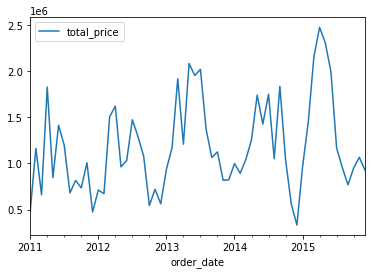

In [253]:
# QUICK PLOT ----

sales_by_months.plot(x='order_date', y='total_price')
plt.show()

In [ ]:
data_ = sales_by_months

In [264]:
ggplot(aes(x="order_date", y="total_price"), data=data_)

TypeError: __init__() got multiple values for argument 'data'

In [263]:
ggplot(aes(x="order_date", y="total_price"), data=data_)

TypeError: __init__() got multiple values for argument 'data'